# Sampling Distribution & Confidence Interval

# Sampling

*To infer a value, you can infer it from the entire population or from a fraction of the population, which is called the sample.*

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

In [100]:
df = pd.read_csv('C:\\Users\\sunta\\OneDrive\\Desktop\\data\\sampling\\wine\\winequality-red.csv', index_col=False)

In [101]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
np.random.seed(10)
sample_7_above = df[df['quality']>=7].sample(10)[['alcohol']]

In [103]:
sample_7_above

,alcohol
947,12.400000
1132,13.600000
945,11.100000
978,11.300000
583,9.900000
1475,13.566667
281,9.900000
375,11.800000
996,12.800000
1107,11.700000


# Mean & Standard Deviation of the sample

In [104]:
mean = np.round((np.mean(sample_7_above['alcohol'])),2)
std = np.round((np.std(sample_7_above['alcohol'])),2)

In [105]:
print('Printing sample mean', mean)
print('Printing standard deviation',std)

Printing sample mean 11.81
Printing standard deviation 1.25


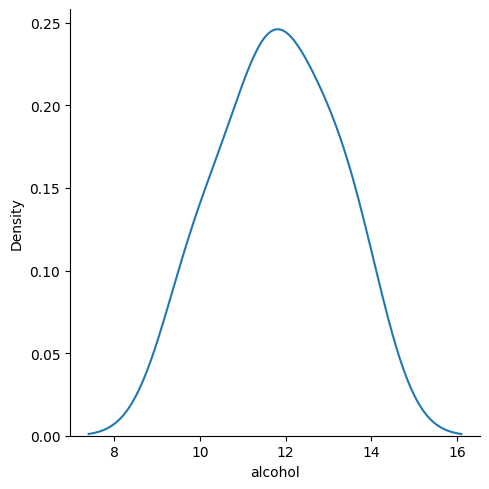

In [106]:
sns.displot(data=sample_7_above,x='alcohol', kind='kde')

*The point estimates are never perfect, they always have an error component. This is commenly referred to as "margin of error".*

In [107]:
seed = range(10)
mean = []
std_dev = []

for s in seed:
    np.random.seed(s)
    sample_7_above = df[df['alcohol']>=7].sample(10)
    mean.append(np.round((np.mean(sample_7_above['alcohol'])),2))
    std_dev.append(np.round((np.std(sample_7_above['alcohol'])),2))


In [108]:
sample = pd.DataFrame(columns=['Mean', 'Std Dev'], data=list(zip(mean, std_dev)))

Expected value (mean) of the X̄:

E(X¯n)=μ
 
The expected value of the of the X̄ = population mean.

Points to consider from this:
The expected value of X̄ is the best estimate for μ. But for this we have to take all the possible samples from the population, which is not our goal.

The best we are going to do is to come up with a range (or interval) for the value of μ

But our interval estimate will be affected by sample size and degree of "confidence".

*Influence of sample size.*

If we had taken 20 samples insted of 10, what will the value of our 𝜎𝑥 be?

σx¯=1.5520−−√=0.34

It does down by 0.15. What if we took 100 samples?

σx¯=1.55100−−−√=0.155

Another way to think about that is as the number of samples increases, we are getting a value of X̄ closer to the actual population mean μ.

Important implication of that: The standard error of the mean will remain the SAME for ANY sample of size 10.

In our case, for any batch of 10 samples, the standard error of the mean will always remain 0.49 (assuming population standard deviation remains the same).

# Central Limit Theorem

*If we take many samples from population of any shape, then if we do a distribution of sample means, it will be normal*

<Axes: xlabel='alcohol', ylabel='Count'>

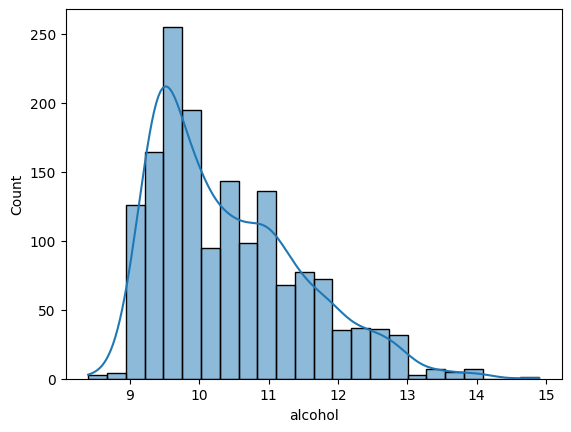

In [109]:
# Original distribution
sns.histplot(df['alcohol'],kde=True)
# Right skewed normal distribution. This is not central limit theorm, we need to take samples and means

In [110]:
sample_7_above.shape

(10, 12)

In [111]:
# 100 different samples
seed = range(100)
mean=[]

for s in seed:
    np.random.seed(s)
    samples = df[df['alcohol']>=7].sample(10)
    mean.append(np.round((np.mean(samples)),2))

<Axes: ylabel='Count'>

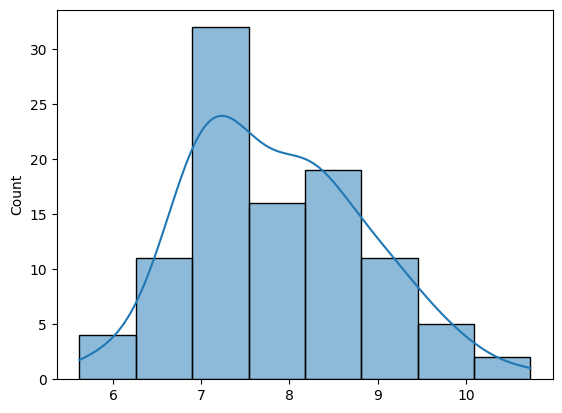

In [112]:
# 100 times random sample of 10. We are getting close to CLT. 
sns.histplot(mean, kde=True)

In [113]:
seed = range(1000)
mean =[]

for s in seed:
    np.random.seed(s)
    sample_500=df[df['alcohol']>=7].sample(10)
    mean.append(np.round((np.mean(sample_500)),2))

<Axes: ylabel='Count'>

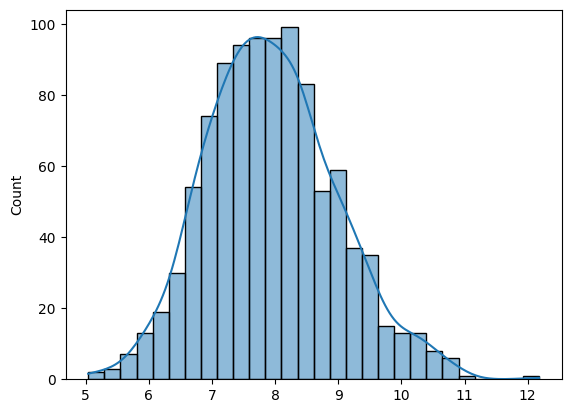

In [114]:
sns.histplot(mean, kde=True)
# CLT

Read better -https://www.kaggle.com/code/gireeshs/learn-statistics-1-sampling-sample-distribution/notebook

Youtube - https://www.youtube.com/watch?v=4v41z3HwLaM